Description:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Demographics of the dataset as provided in Kaggle:

Number of Attributes: 4 (including the class attribute)

Attribute Information:

    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Missing Attribute Values: None

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
haberman_df=pd.read_csv("C:/Users/IBM_ADMIN/Desktop/appliedai/habermans-survival-data-set/haberman.csv")

In [4]:
haberman_df.head(5)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


The dataset doesn't have a header. The next step is to attribute the column names to the dataset from the metadata available.

In [5]:
haberman_df.columns=[["Age_by_operation_day","operation_year","pos_axillary_nodes_count","Survived"]]

In [6]:
haberman_df.head(5)

,Age_by_operation_day,operation_year,pos_axillary_nodes_count,Survived
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


What is an axillary Lymph Node?

Cancer cells can also get into the lymphatic system and get lodged in lymph nodes. When they are in the armpit, these filter points are called axillary lymph nodes.

Lymph node status is highly related to prognosis.

    Lymph node-negative means the axillary lymph nodes do not contain cancer.
    Lymph node-positive means the axillary lymph nodes contain cancer. 

Prognosis is better when cancer has not spread to the lymph nodes (lymph node-negative) [9]. 

The more lymph nodes that contain cancer(that are positive), the poorer prognosis tends to be 

References : https://www.medicalnewstoday.com/articles/319713.php,                                             https://ww5.komen.org/BreastCancer/LymphNodeStatus.html

In [7]:
haberman_df.Survived.value_counts()

1    224
2     81
Name: Survived, dtype: int64

The class appears to be imbalanced. 




Univariate & Bi-variate Analysis: Analyze the impact of each feature on each class.

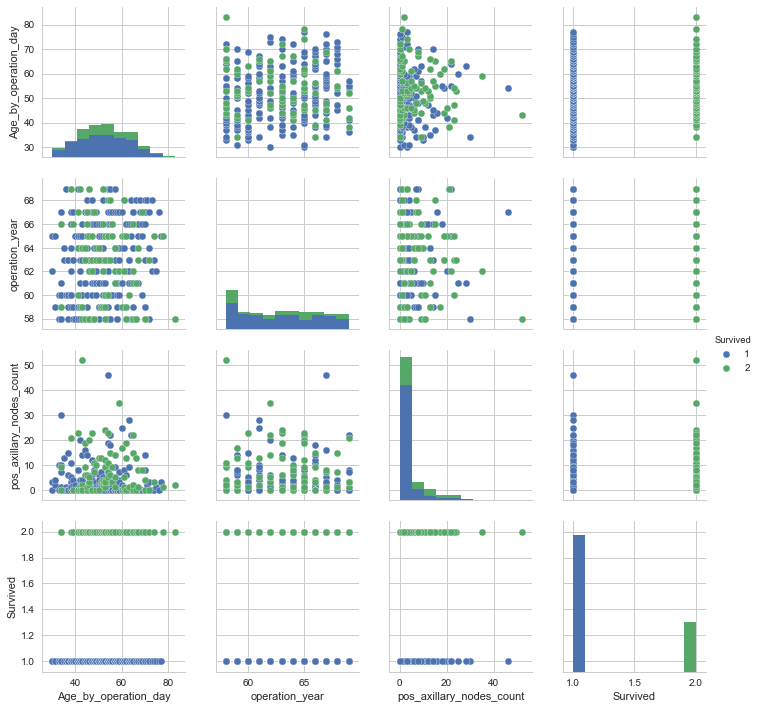

In [10]:
sns.set_style('whitegrid');
sns.pairplot(haberman_df,hue='Survived')

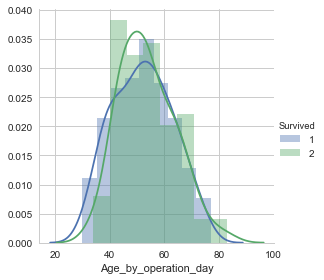

In [11]:
sns.FacetGrid(haberman_df,hue='Survived',size=4) \
   .map(sns.distplot,"Age_by_operation_day")\
    .add_legend()
plt.show()

Age doesn't seem to have any impact on the class as the two curves almost converged.

In [ ]:
haberman_df["Survived"]=haberman_df.Survived.replace(to_replace=2,value="not_surived")
haberman_df["Survived"]=haberman_df.Survived.replace(to_replace=1,value="surived")

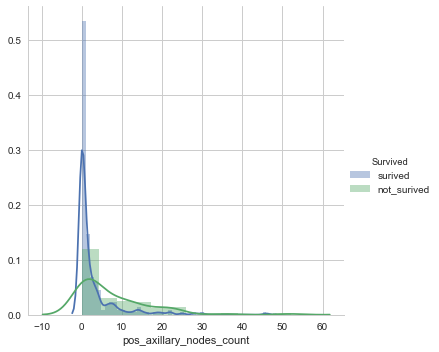

In [25]:
sns.FacetGrid(haberman_df,hue='Survived',size=5) \
   .map(sns.distplot,"pos_axillary_nodes_count")\
    .add_legend()
plt.show()

If positive axillary node count <= 3, The likelihood for survival is 30% whereas for non-survival it is 5%.
Hence,positive axillary nodes count appears to be separating them almost linearly.

Let's validate our assumption with the numbers

In [96]:
haberman_lessthan3_df=haberman_df[haberman_df.pos_axillary_nodes_count<=3]
haberman_lessthan3_df.Survived.value_counts()

surived        177
not_surived     39
Name: Survived, dtype: int64

In [190]:
haberman_lt3_agerange_df=pd.crosstab(haberman_zero_df.Age_by_operation_day,haberman_zero_df.Survived)
haberman_lt3_agerange_df=haberman_lt3_agerange_df.unstack().reset_index()
haberman_lt3_agerange_df.head(6)

,Survived,Age_by_operation_day,0
0,not_surived,30,0
1,not_surived,31,0
2,not_surived,33,0
3,not_surived,34,1
4,not_surived,35,0
5,not_surived,36,0


In [196]:
haberman_lt3_agerange_df.columns=['Survived','Age','Cnt']
haberman_lt3_agerange_df.head(3)

,Survived,Age,Cnt
0,not_surived,30,0
1,not_surived,31,0
2,not_surived,33,0



Let's segregate the patients into different age groups to observe the mortality trends w.r.t their low positive axillary node counts.

In [273]:
haberman_lt3_agerange_df["Agegroup"]=np.where((haberman_lt3_agerange_df.Age<=40),'1-<40',(np.where((haberman_lt3_agerange_df.Age>40) & (haberman_lt3_agerange_df.Age<=50),'2-40 and 50',(np.where((haberman_lt3_agerange_df.Age>50) & (haberman_lt3_agerange_df.Age<=60),'3-50 and 60',(np.where((haberman_lt3_agerange_df.Age>60) & (haberman_lt3_agerange_df.Age<=70),'4-60 and 70','5->70')))))))

In [274]:
haberman_lt3_agerange_df.head(10)

,Survived,Age,Cnt,Agegroup
0,not_surived,30,0,1-<40
1,not_surived,31,0,1-<40
2,not_surived,33,0,1-<40
3,not_surived,34,1,1-<40
4,not_surived,35,0,1-<40
5,not_surived,36,0,1-<40
6,not_surived,37,0,1-<40
7,not_surived,38,0,1-<40
8,not_surived,39,1,1-<40
9,not_surived,40,0,1-<40


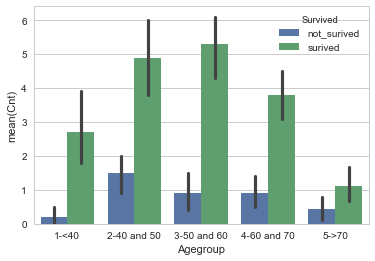

In [278]:
sns.barplot(x='Agegroup',y="Cnt",hue='Survived',data=haberman_lt3_agerange_df)

The average mortality rate of the patients in all the age groups except for the age group of 40 and 50 which is close to 1.8.

Hence it can be inferred that the patients whose positive axillary node count is less than 3 are more likely to survive irrespective of any age group.













Analysis for the patients with positive axillary node count greater than 3

In [327]:
haberman_gt3_df=haberman_df[haberman_df.pos_axillary_nodes_count>3]
haberman_gt3_df.Survived.value_counts()
haberman_gt3_df.head(6)

,Age_by_operation_day,operation_year,pos_axillary_nodes_count,Survived
3,31,65,4,surived
4,33,58,10,surived
7,34,66,9,not_surived
8,34,58,30,surived
10,34,61,10,surived
11,34,67,7,surived


The class is balanced for this condition.

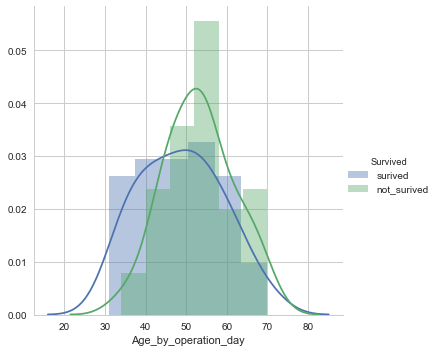

In [284]:
sns.FacetGrid(haberman_gt3_df,hue='Survived',size=5) \
   .map(sns.distplot,"Age_by_operation_day")\
    .add_legend()
plt.show()

The patients less than the age 45 have more chances of survival than the patients more than 45.

Let's validate this observation with some numbers and visualizations.

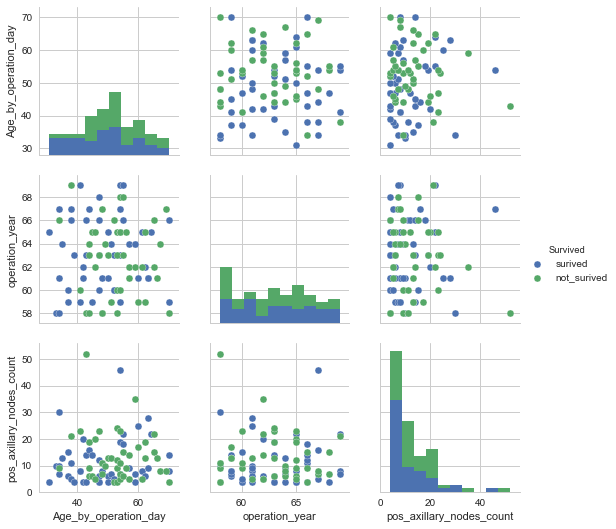

In [286]:
sns.pairplot(haberman_gt3_df,hue='Survived')

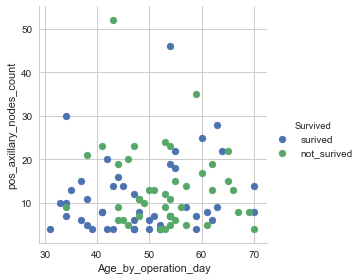

In [288]:
#2-D scatter plot
sns.set_style("whitegrid")
sns.FacetGrid(haberman_gt3_df,hue='Survived',size=4) \
   .map(plt.scatter,"Age_by_operation_day","pos_axillary_nodes_count")\
    .add_legend()
plt.show()

Nothing can be inferred from the above scatter plot.Let's observe the trends in different agegroups

In [341]:
haberman_gt3_df_sub=pd.crosstab(haberman_gt3_df.Age_by_operation_day,haberman_gt3_df.Survived)
haberman_gt3_df_sub=haberman_gt3_df_sub.unstack().reset_index()
haberman_gt3_df_sub.head()

,Survived,Age_by_operation_day,0
0,not_surived,31,0
1,not_surived,33,0
2,not_surived,34,1
3,not_surived,35,0
4,not_surived,37,0


In [342]:
haberman_gt3_df_sub["Agegroup"]=np.where((haberman_gt3_df_sub.Age_by_operation_day<=40),'1-<40',(np.where((haberman_gt3_df_sub.Age_by_operation_day>40) & (haberman_gt3_df_sub.Age_by_operation_day<=50),'2-40 and 50',(np.where((haberman_gt3_df_sub.Age_by_operation_day>50) & (haberman_gt3_df_sub.Age_by_operation_day<=60),'3-50 and 60',(np.where((haberman_gt3_df_sub.Age_by_operation_day>60) & (haberman_gt3_df_sub.Age_by_operation_day<=70),'4-60 and 70','5->70')))))))

In [345]:
haberman_gt3_df_sub.columns=[['Survived','Age','Cnt','Agegroup']]
haberman_gt3_df_sub.head(5)

,Survived,Age,Cnt,Agegroup
0,not_surived,31,0,1-<40
1,not_surived,33,0,1-<40
2,not_surived,34,1,1-<40
3,not_surived,35,0,1-<40
4,not_surived,37,0,1-<40


(0, 6)

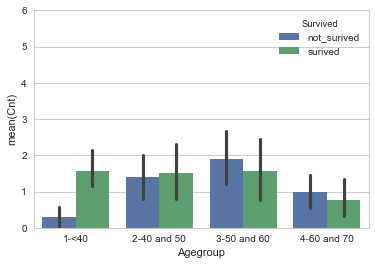

In [353]:
g=sns.barplot(x='Agegroup',y="Cnt",hue='Survived',data=haberman_gt3_df_sub)
g.set_ylim(0, 6)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


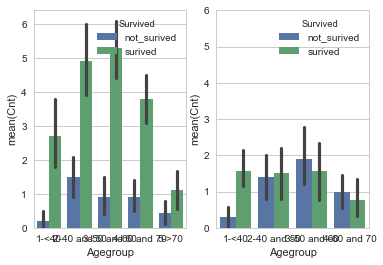

In [354]:
fig, ax =plt.subplots(1,2)
sns.barplot(x='Agegroup',y="Cnt",hue='Survived',data=haberman_lt3_agerange_df,ax=ax[0])
g=sns.barplot(x='Agegroup',y="Cnt",hue='Survived',data=haberman_gt3_df_sub)
g.set_ylim(0, 6)
fig.show()

From the above barplot, It can be inferred that patients of age less than 40 have more chances of survival.

But the patients whose age is greater than 50,The chances of survival is less.

Final Observations :-

1) Age less than 40 : Irrespective of axillary node count > or <3, The mean survival rate is almost neglibile i.e less than 1 in both the cases. Hence, These patients have more chances of survival even after 5 years of operation.

2) Age between 40 and 50 :Their survival after 5 years of operation is at moderate risk as the mean survival rate is almost same when the pos axillary node count is greater than 3 
But there is a drastic improvement in survival rate when the axillary node count is <3

3) Age greater than 50 : These patients are at high risk if they have elevated count of positive axillary nodes.